<a href="https://colab.research.google.com/github/lleelesh/Python-Practice/blob/main/Regression_WC_AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wc=pd.read_csv('/content/WC_AT.csv')

In [3]:
wc  

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [4]:
wc.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [5]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [6]:
wc.isnull()

,Waist,AT
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
104,False,False
105,False,False
106,False,False
107,False,False


In [7]:
wc.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [8]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [10]:
wc.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [12]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


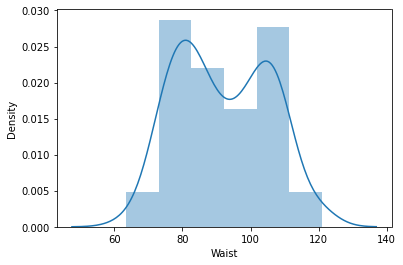

In [15]:
sns.distplot(wc['Waist'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


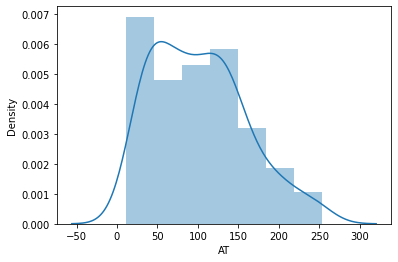

In [16]:
sns.distplot(wc['AT'])

In [18]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
model=smf.ols('AT~Waist',data=wc).fit()

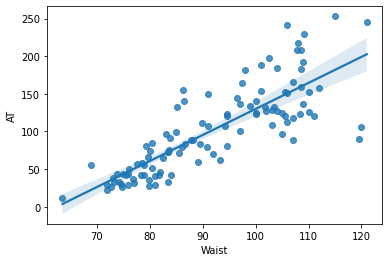

In [37]:
sns.regplot(x='Waist',y='AT',data=wc)

In [38]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [39]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [40]:
model.rsquared

0.670036893052843

In [41]:
newdata=pd.Series([65,150,40])

In [45]:
data_pred=(pd.DataFrame(newdata,columns=['Waist']))

In [46]:
data_pred

,Waist
0,65
1,150
2,40


In [47]:
model.predict(data_pred)

0      8.844373
1    302.847421
2    -77.627112
dtype: float64

In [48]:
data=pd.Series([100,25,85])

In [52]:
data_pred1=(pd.DataFrame(data,columns=['Waist']))

In [53]:
model.predict(data_pred1)

0    129.904451
1   -129.510003
2     78.021560
dtype: float64